[View in Colaboratory](https://colab.research.google.com/github/PrajwalPrashanth/EIP2_Phase1/blob/master/Session%203/Assignments/3A/MnistCNN.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


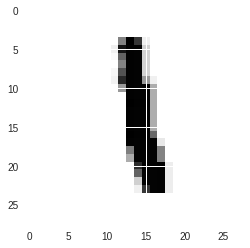

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[6])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:2]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [89]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(SeparableConv2D(filters=32, kernel_size=(13,13), activation='relu'))
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=10, kernel_size=(10,10), activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  


In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
separable_conv2d_82 (Separab (None, 24, 24, 32)        688       
_________________________________________________________________
separable_conv2d_83 (Separab (None, 22, 22, 64)        2400      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 32)        2080      
_________________________________________________________________
separable_conv2d_84 (Separab (None, 10, 10, 32)        6464      
_________________________________________________________________
dropout_22 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
separable_conv2d_85 (Separab (None, 1, 1, 10)          3530      
__________

In [0]:

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [92]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 648us/step - loss: 0.3244 - acc: 0.8969 - val_loss: 0.0915 - val_acc: 0.9708
Epoch 2/5
60000/60000 [==============================] - 37s 610us/step - loss: 0.0923 - acc: 0.9722 - val_loss: 0.0646 - val_acc: 0.9793
Epoch 3/5
60000/60000 [==============================] - 37s 611us/step - loss: 0.0679 - acc: 0.9793 - val_loss: 0.0495 - val_acc: 0.9840
Epoch 4/5
60000/60000 [==============================] - 37s 610us/step - loss: 0.0564 - acc: 0.9826 - val_loss: 0.0424 - val_acc: 0.9871
Epoch 5/5
60000/60000 [==============================] - 37s 611us/step - loss: 0.0473 - acc: 0.9851 - val_loss: 0.0584 - val_acc: 0.9821


In [93]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 613us/step - loss: 0.0421 - acc: 0.9872 - val_loss: 0.0336 - val_acc: 0.9904
Epoch 2/5
60000/60000 [==============================] - 37s 610us/step - loss: 0.0385 - acc: 0.9877 - val_loss: 0.0332 - val_acc: 0.9897
Epoch 3/5
60000/60000 [==============================] - 37s 612us/step - loss: 0.0351 - acc: 0.9891 - val_loss: 0.0268 - val_acc: 0.9908
Epoch 4/5
60000/60000 [==============================] - 37s 610us/step - loss: 0.0321 - acc: 0.9898 - val_loss: 0.0302 - val_acc: 0.9898
Epoch 5/5
60000/60000 [==============================] - 37s 612us/step - loss: 0.0308 - acc: 0.9900 - val_loss: 0.0320 - val_acc: 0.9891


In [94]:
model.fit(X_train, Y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 448us/step - loss: 0.0200 - acc: 0.9940 - val_loss: 0.0244 - val_acc: 0.9921
Epoch 2/5
60000/60000 [==============================] - 27s 446us/step - loss: 0.0211 - acc: 0.9932 - val_loss: 0.0277 - val_acc: 0.9904
Epoch 3/5
60000/60000 [==============================] - 27s 446us/step - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0287 - val_acc: 0.9909
Epoch 4/5
60000/60000 [==============================] - 27s 447us/step - loss: 0.0202 - acc: 0.9935 - val_loss: 0.0321 - val_acc: 0.9911
Epoch 5/5
60000/60000 [==============================] - 27s 445us/step - loss: 0.0193 - acc: 0.9935 - val_loss: 0.0367 - val_acc: 0.9898


In [95]:
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 361us/step - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0247 - val_acc: 0.9926
Epoch 2/5
60000/60000 [==============================] - 22s 358us/step - loss: 0.0106 - acc: 0.9964 - val_loss: 0.0274 - val_acc: 0.9926
Epoch 3/5
60000/60000 [==============================] - 21s 358us/step - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0265 - val_acc: 0.9920
Epoch 4/5
60000/60000 [==============================] - 21s 358us/step - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0286 - val_acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 21s 358us/step - loss: 0.0110 - acc: 0.9965 - val_loss: 0.0267 - val_acc: 0.9925


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [97]:
print(score) # parameters: 15,322
             # epochs: 20 (bs_32:10,bs_64:5,bs_128:5)

[0.026707178564036076, 0.9925]


In [0]:
model.save_weights('model_weights.h5')

In [0]:
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [0]:
model.save('MnistCNN.h5')

In [0]:
from google.colab import files


In [126]:
!ls

MnistCNN.h5		 model_weights.h5  sample_data
model_architecture.json  my_model.h5


In [0]:
files.download('model_weights.h5')

In [0]:
model.save('MnistCNN.h5')

In [0]:
!cd /content/models

In [155]:
!pwd

/content


In [0]:
y_pred = model.predict(X_test)

In [99]:
print(y_pred[:9])
print(y_test[:9])

[[3.1002839e-12 3.1002839e-12 3.6420753e-09 3.6799469e-07 3.1002839e-12
  3.1002839e-12 3.1002839e-12 9.9999964e-01 3.1002839e-12 1.6665361e-08]
 [1.4377885e-10 1.9598075e-10 9.9999976e-01 1.1352099e-11 1.4838587e-10
  1.5526561e-09 8.5141963e-11 1.1352099e-11 2.0773389e-07 1.8188206e-11]
 [6.1821964e-07 9.9986744e-01 6.1821964e-07 6.1821964e-07 9.1349088e-05
  6.1821964e-07 6.1821964e-07 3.4386474e-05 3.1881650e-06 6.1821964e-07]
 [9.9999499e-01 2.6719449e-10 6.6732024e-09 2.6719449e-10 2.6719449e-10
  1.0615119e-09 4.9944551e-06 2.4881881e-08 2.6719449e-10 2.6719449e-10]
 [5.6566613e-11 8.8931412e-10 5.6566613e-11 5.6566613e-11 9.9999988e-01
  5.6566613e-11 5.6566613e-11 5.6566613e-11 5.6566613e-11 1.0038871e-07]
 [5.8863424e-08 9.9998534e-01 1.0876460e-07 5.8863424e-08 4.7168724e-06
  5.8863424e-08 5.8863424e-08 9.2301416e-06 4.6910037e-07 5.8863424e-08]
 [3.6094389e-10 1.3863179e-07 3.6094389e-10 3.6094389e-10 9.9999952e-01
  3.9220730e-08 3.6094389e-10 3.6094389e-10 6.1577651e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [83]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored

In [20]:
y_train.shape

(60000,)

In [0]:
[0.07641638516254279, 0.9829] default
[0.05600948565435883, 0.9864] batch 32 epoch 10 layers 32,64,10,10

In [0]:
30 ep
loss: 0.0373 - acc: 0.9883 - val_loss: 0.0372 - val_acc: 0.9884
        
        model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(SeparableConv2D(filters=10, kernel_size=(10,10), activation='relu'))
model.add(SeparableConv2D(filters=10, kernel_size=(11,11), activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(SeparableConv2D(filters=10, kernel_size=(10,10), activation='relu'))
model.add(SeparableConv2D(filters=10, kernel_size=(11,11), activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

20 ep
43s 721us/step - loss: 0.0265 - acc: 0.9911 - val_loss: 0.0479 - val_acc: 0.9877


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(SeparableConv2D(filters=10, kernel_size=(10,10), activation='relu'))
model.add(SeparableConv2D(filters=10, kernel_size=(11,11), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Activation('softmax'))

train loss high and test loss very low

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(SeparableConv2D(filters=16, kernel_size=(11,11), activation='relu'))
model.add(SeparableConv2D(filters=10, kernel_size=(10,10), activation='relu'))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Activation('softmax'))

highest achieved
6s 760us/step - loss: 0.3659 - acc: 0.8603 - val_loss: 0.0330 - val_acc: 0.9935
        
after 1024 15
      32   34

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(SeparableConv2D(filters=16, kernel_size=(11,11), activation='relu'))
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters=10, kernel_size=(10,10), activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))


hit over 99.2 4 times in ep 20 tp 30

with drouput .3 over 99.2 3 times in ep 25 to 30 

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(SeparableConv2D(filters=32, kernel_size=(11,11), activation='relu'))
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=10, kernel_size=(10,10), activation='relu'))
model.add(Dropout(.05))
model.add(Flatten())
model.add(Activation('softmax'))

80 and 256 batch 99.2 in under 20 ep
